# Data Exploration:)

import steam.GetPlayerSummaries.json file and steam.GetOwnedGames.json

In [96]:
import json
import pprint
from pymongo import MongoClient
import pandas as pd

client = MongoClient()
db = client.DS504
db.collection_names(include_system_collections=False)

['ownedGames',
 'GetPlayerSummaries',
 'GetOwnedGames09241524',
 'GetPlayerSummaries09250948',
 'GetOwnedGames09240049',
 'playerSum',
 'GetPlayerSummaries09241524',
 'GetOwnedGames09250948',
 'GetOwnedGames09231725',
 'GetPlayerSummaries09231725',
 'GetPlayerSummaries09240049']

In [18]:
playerSum = db.playerSum
ownedGames = db.ownedGames
playerTotal = 45709
gamesTotal = 35670
init = 76561197960265728
end = 76561198422588320

## The propotion of private (or friend view only) users and public users in PlayerSummaries. 

"communityvisibilitystate": 3    --public

In [22]:
a = playerSum.aggregate([{"$group": {"_id": "$communityvisibilitystate", "count":{"$sum":1}}}], useCursor=False)

In [23]:
list(a)

[{'_id': 2, 'count': 808},
 {'_id': 1, 'count': 620},
 {'_id': 3, 'count': 44281}]

In [24]:
44281/playerTotal

0.9687588877463956

### 96.9% users are public users.

## The propotion of private (or friend view only) users and public users in OwnedGames. 

In [119]:
gamesTotal/50000

0.7134

### 71.3% users public his/her list of owned games

## Number of active users (logged in recent half year - Mar 25th 2017)
Epoch timestamp: 1490424459
Timestamp in milliseconds: 1490424459000
Human time (GMT): Saturday, March 25, 2017 6:47:39 AM

In [162]:
numActiveUsers = playerSum.find({"lastlogoff": {"$gt": 1490424459}}).count() + playerSum.find({"lastlogoff": {"$exists": False}, "personastate": 0}).count()
print(numActiveUsers)
print(numActiveUsers/ playerTotal)

20925
0.45778730665733225


### the number of active users is 20925, it's 45.8% of total users

## Average playtime by appid (game)

In [232]:
b = ownedGames.aggregate([{"$unwind": "$response"}, 
   #                       {"$match":{"$response.game_count": {"gt": 0}} }, 
                          {"$unwind": "$response.games"},
                          {"$group":{
                             "_id":{
                                 "appid": "$response.games.appid",
                                 "name": "$response.games.name"
                             },
                             "numPlayer":{"$sum": 1},
                             "totalTime": {"$sum": "$response.games.playtime_forever"}
                          }}
                         ])

In [233]:
l=[]
for line in b:
    l.append([line['_id']['appid'], line['_id']['name'], line['numPlayer'], line['totalTime']])

gameData = pd.DataFrame(l, columns=('appid', 'name', 'numPlayer', 'totalTime'))
gameData.head()

,appid,name,numPlayer,totalTime
0,263940,Red Baron Pack,1,0
1,592300,Slowdrive,1,110
2,551500,Star Fight,1,0
3,549670,Incursion The Thing,1,277
4,592780,Bang Bang Car,1,0


In [236]:
gameData['avgTime(h)PerP'] = gameData['totalTime']/gameData['numPlayer']/float(60)
gameData.head(10)

,appid,name,numPlayer,totalTime,avgTime(h)PerP
0,263940,Red Baron Pack,1,0,0.000000
1,592300,Slowdrive,1,110,1.833333
2,551500,Star Fight,1,0,0.000000
3,549670,Incursion The Thing,1,277,4.616667
4,592780,Bang Bang Car,1,0,0.000000
5,428220,TurnOn,1,0,0.000000
6,692140,Pressure Overdrive - Soundtrack,1,0,0.000000
7,425240,Pressure Overdrive,1,0,0.000000
8,534980,Never Forget Me,1,1,0.016667
9,512180,Nightshade,1,2,0.033333


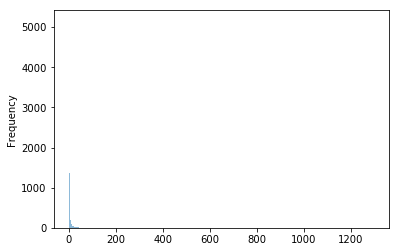

appid                             314980
name              Supreme Ruler Ultimate
numPlayer                              1
totalTime                          77716
avgTime(h)PerP                   1295.27
Name: 119, dtype: object

In [256]:
import matplotlib.pyplot as plt
avgTime = gameData['avgTime(h)PerP']
avgTime.plot.hist(alpha=0.5, bins=1000)
plt.show()

print('The maximu')
gameData.loc[gameData['avgTime(h)PerP'].argmax()]

## Examine the distribution of invalid user (for random sampled 50 bucket sampling)

In [15]:
idSample = pd.read_csv("idList_2017-09-23 03-08", header = None)
print(idSample.head())

bucketSample = pd.read_csv("bucketsList_2017-09-23 03-08", header = None)
print(bucketSample.head())

                   0
0  76561198208019028
1  76561198207709726
2  76561198207893896
3  76561198207943779
4  76561198207841163
     0
0  535
1  589
2   58
3  253
4  373


In [59]:
# idReturned = []
# for doc in playerSum.find():
#     h = doc["_id"]
#     print(type(h))
#     print(playerSum.index(playerSum.isin(h)))
count = []
for i in range(len(idSample)):
    a = playerSum.find({"steamid": str(idSample.iloc[i][0])})
    if not list(a):
        count.append(i)
print(count)

[1, 8, 12, 16, 20, 25, 32, 34, 35, 37, 41, 47, 49, 55, 59, 66, 68, 69, 70, 73, 85, 93, 95, 100, 102, 103, 108, 113, 114, 118, 121, 125, 126, 129, 131, 137, 144, 157, 159, 163, 165, 167, 169, 173, 175, 179, 181, 182, 184, 185, 187, 191, 199, 200, 207, 210, 212, 213, 215, 220, 222, 232, 240, 252, 257, 268, 269, 272, 274, 277, 280, 284, 287, 290, 292, 297, 298, 309, 318, 323, 325, 326, 331, 333, 340, 350, 355, 358, 361, 366, 367, 368, 369, 372, 378, 379, 381, 382, 383, 396, 398, 402, 404, 405, 411, 415, 417, 418, 421, 428, 432, 433, 436, 437, 438, 443, 448, 454, 455, 459, 469, 470, 480, 484, 494, 498, 501, 503, 507, 510, 514, 516, 517, 518, 520, 533, 542, 546, 547, 548, 549, 550, 554, 565, 568, 569, 573, 576, 582, 586, 588, 593, 594, 606, 615, 622, 628, 633, 645, 648, 652, 657, 660, 668, 669, 673, 676, 679, 680, 685, 687, 688, 691, 701, 704, 707, 711, 712, 719, 721, 722, 724, 726, 731, 744, 747, 748, 750, 757, 758, 760, 765, 779, 788, 794, 804, 805, 812, 815, 817, 818, 820, 833, 835, 837,

In [125]:
init = 76561197960265728
bucketInval = {i: 0 for i in bucketSample.iloc[:][0]}
# print(bucketInval2)
print(len(count))
for i in count:
    bucketID = int((idSample.iloc[i][0] - init)/462322)
    bucketInval[bucketID] +=1
print(bucketInval)

4291
{535: 245, 589: 755, 58: 315, 253: 0, 373: 0, 609: 516, 832: 0, 674: 0, 938: 0, 134: 0, 151: 0, 975: 0, 786: 0, 812: 0, 651: 0, 521: 237, 132: 0, 910: 0, 104: 6, 741: 0, 202: 0, 90: 16, 679: 0, 437: 0, 157: 0, 951: 0, 986: 0, 558: 228, 477: 229, 925: 0, 68: 24, 691: 0, 456: 217, 653: 0, 991: 0, 579: 756, 740: 0, 810: 0, 694: 0, 931: 0, 95: 4, 475: 260, 183: 1, 964: 0, 606: 482, 898: 0, 842: 0, 769: 0, 797: 0, 954: 0}


## Examine the distribution of invalid user (for stratified sampling 1000 bucket)

In [97]:
idSample2 = pd.read_csv("idList_1000buckets_150_2017-09-27 15-37", header = None)
print(idSample2.head())

bucketSample2 = pd.read_csv("bucketsList_1000buckets_150_2017-09-27 15-37", header = None)
print(bucketSample2.head())
count2 = []
for i in range(len(idSample2)):
    a = db.GetPlayerSummaries.find({"steamid": str(idSample2.iloc[i][0])})
    if not list(a):
        count2.append(i)
print(count2)

                   0
0  76561197960314308
1  76561197960455150
2  76561197960312370
3  76561197960562233
4  76561197960502637
   0
0  0
1  1
2  2
3  3
4  4
[4, 16, 22, 24, 28, 31, 37, 38, 52, 56, 57, 62, 65, 72, 77, 80, 83, 84, 88, 95, 98, 102, 107, 111, 117, 120, 123, 132, 133, 134, 137, 138, 146, 149, 150, 152, 153, 154, 155, 157, 162, 163, 164, 165, 171, 174, 176, 178, 182, 183, 184, 185, 187, 189, 193, 194, 196, 199, 200, 201, 204, 207, 208, 209, 213, 219, 220, 221, 223, 224, 228, 231, 233, 234, 237, 238, 244, 249, 250, 251, 252, 255, 257, 262, 263, 264, 265, 266, 267, 269, 270, 271, 272, 274, 277, 283, 284, 285, 286, 287, 289, 294, 296, 298, 300, 302, 304, 306, 307, 308, 312, 315, 316, 319, 320, 326, 328, 330, 331, 333, 334, 335, 336, 338, 339, 340, 341, 342, 344, 345, 347, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 361, 365, 367, 369, 370, 371, 372, 373, 375, 377, 378, 381, 383, 384, 387, 391, 392, 397, 398, 403, 405, 406, 408, 410, 412, 414, 417, 419, 422, 423, 424, 429, 

In [146]:
init = 76561197960265728
bucketInval2 = {i: 0 for i in bucketSample2.iloc[:][0]}
# print(bucketInval2)
print(len(count2))
for i in count2:
    bucketID2 = int((idSample2.iloc[i][0] - init)/462322)
    bucketInval2[bucketID2] +=1
print(bucketInval2)

17541
{0: 34, 1: 70, 2: 79, 3: 72, 4: 86, 5: 90, 6: 62, 7: 87, 8: 108, 9: 95, 10: 103, 11: 105, 12: 111, 13: 107, 14: 97, 15: 108, 16: 98, 17: 98, 18: 100, 19: 98, 20: 107, 21: 85, 22: 42, 23: 54, 24: 76, 25: 87, 26: 69, 27: 93, 28: 106, 29: 98, 30: 98, 31: 97, 32: 97, 33: 82, 34: 110, 35: 98, 36: 95, 37: 90, 38: 98, 39: 111, 40: 102, 41: 102, 42: 90, 43: 106, 44: 96, 45: 99, 46: 90, 47: 97, 48: 96, 49: 100, 50: 101, 51: 78, 52: 96, 53: 96, 54: 100, 55: 90, 56: 93, 57: 68, 58: 40, 59: 2, 60: 1, 61: 2, 62: 2, 63: 4, 64: 3, 65: 1, 66: 2, 67: 5, 68: 2, 69: 0, 70: 4, 71: 4, 72: 8, 73: 4, 74: 3, 75: 0, 76: 3, 77: 1, 78: 0, 79: 2, 80: 1, 81: 0, 82: 4, 83: 2, 84: 0, 85: 4, 86: 2, 87: 2, 88: 2, 89: 1, 90: 2, 91: 2, 92: 0, 93: 1, 94: 3, 95: 0, 96: 1, 97: 1, 98: 1, 99: 2, 100: 3, 101: 2, 102: 1, 103: 2, 104: 1, 105: 1, 106: 3, 107: 4, 108: 3, 109: 1, 110: 6, 111: 3, 112: 9, 113: 8, 114: 1, 115: 2, 116: 3, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 1, 128

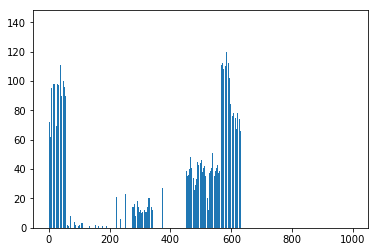

In [150]:
import matplotlib.pyplot as plt
import numpy as np
f, ax = plt.subplots()
ax.bar(list(bucketInval2.keys()), list(bucketInval2.values()), width = 0.8)
plt.show()

### export invalid id bucket csv

In [155]:
output = pd.DataFrame(list(bucketInval2.items()))
output.to_csv('try_bucketID_invalidID.csv', index=False, header = False)

## Examine number of active users in each bucket

In [177]:
a = db.GetPlayerSummaries.find()
bucketAct = {i: 0 for i in bucketSample2.iloc[:][0]}
bucketGoodKey = range(633, 1000)
for doc in a:
    key = "lastlogoff"
    if key in doc:
        if doc["lastlogoff"] > 1490424459:
            bucketAct[int((int(doc["steamid"]) - init)/462322)] +=1
    else:
        bucketAct[int((int(doc["steamid"]) - init)/462322)] +=1
print(bucketAct)

{0: 66, 1: 55, 2: 40, 3: 50, 4: 45, 5: 39, 6: 62, 7: 44, 8: 26, 9: 41, 10: 29, 11: 23, 12: 20, 13: 22, 14: 35, 15: 27, 16: 28, 17: 35, 18: 28, 19: 31, 20: 23, 21: 38, 22: 62, 23: 60, 24: 42, 25: 33, 26: 55, 27: 37, 28: 26, 29: 34, 30: 27, 31: 27, 32: 29, 33: 33, 34: 22, 35: 21, 36: 33, 37: 32, 38: 27, 39: 19, 40: 27, 41: 21, 42: 27, 43: 14, 44: 21, 45: 18, 46: 23, 47: 21, 48: 16, 49: 21, 50: 11, 51: 24, 52: 12, 53: 14, 54: 15, 55: 13, 56: 10, 57: 22, 58: 16, 59: 18, 60: 18, 61: 22, 62: 21, 63: 19, 64: 16, 65: 15, 66: 18, 67: 19, 68: 17, 69: 24, 70: 24, 71: 36, 72: 23, 73: 25, 74: 19, 75: 28, 76: 23, 77: 26, 78: 21, 79: 22, 80: 17, 81: 14, 82: 25, 83: 23, 84: 20, 85: 23, 86: 30, 87: 20, 88: 23, 89: 19, 90: 18, 91: 35, 92: 33, 93: 29, 94: 20, 95: 40, 96: 19, 97: 30, 98: 27, 99: 25, 100: 33, 101: 37, 102: 35, 103: 27, 104: 22, 105: 27, 106: 26, 107: 28, 108: 32, 109: 30, 110: 24, 111: 32, 112: 26, 113: 24, 114: 27, 115: 32, 116: 21, 117: 30, 118: 32, 119: 28, 120: 35, 121: 37, 122: 29, 12

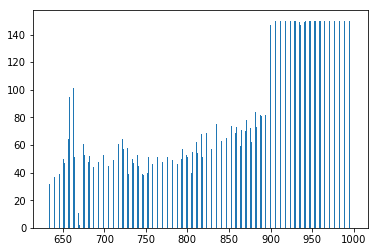

In [181]:
f, ax = plt.subplots()
ax.bar(list(bucketAct.keys())[633:], list(bucketAct.values())[633:], width = 0.3)
plt.show()

In [182]:
output2 = pd.DataFrame([list(bucketAct.keys())[633:], list(bucketAct.values())[633:]])
output2.to_csv('try_bucketID633_activeID.csv', index=False, header = False)